In [1]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
import NS_solver as ns 
import numpy as np

import GenerateData as gd

In [2]:
!dolfin-convert data/mesh/bifurcation.msh data/mesh/bifurcation.xml

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 11100 vertices
Found all vertices
Expecting 21006 cells
Found all cells
Conversion done


In [3]:
mesh_load = gd.MeshLoader("data/mesh/bifurcation")
mesh = mesh_load.mesh
bounds = mesh_load.bounds
face = mesh_load.face

In [4]:
tags = {'walls': [2], 'inlet':[1], 'outlet': [3], 'interface': [4,5,6,7], 'faces': [8,9,10,11,12]}
mesh_load.update_tags(tags)
mesh_load.measure_definition()

(Measure('interior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7fcd8c94b930>),
 Measure('exterior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7fcd8c94b930>),
 Measure('cell', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7fcd9b7f75b0>))

In [5]:
ns = gd.NavierStokes(mesh_load,'Navier-Stokes')
u,p = ns.solve()

Solving linear variational problem.


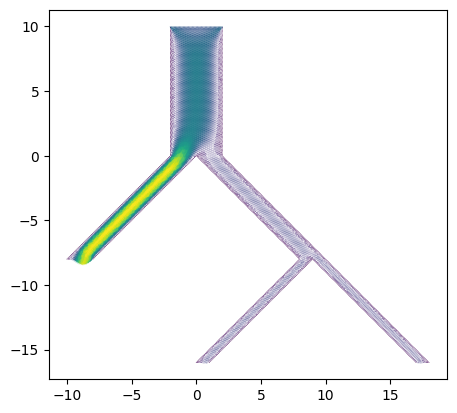

In [6]:
plot(u)

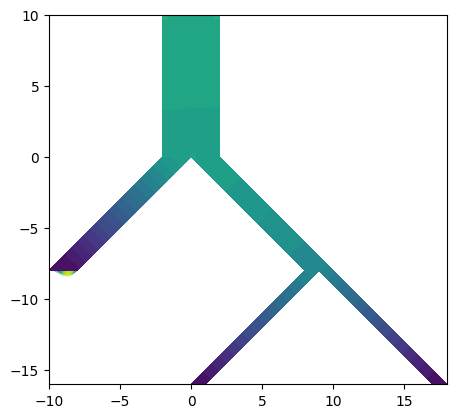

In [7]:
ns.plot_solution()

In [8]:
# #Load mesh
# meshfile = "data/mesh/bifurcation" 
# mesh = Mesh(meshfile + ".xml")
# bounds = MeshFunction("size_t", mesh, meshfile + "_facet_region.xml")
# face = MeshFunction("size_t", mesh, meshfile + "_physical_region.xml")

In [9]:
n = FacetNormal(mesh)
h = mesh.hmin()

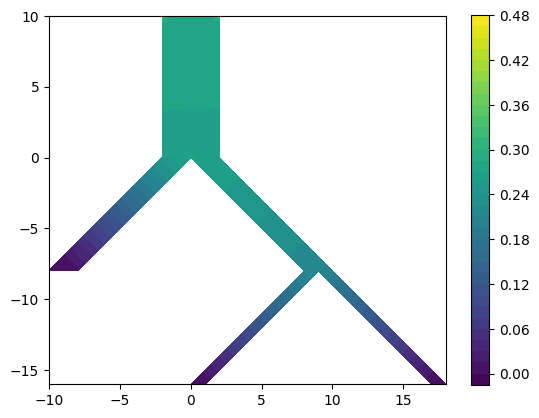

In [10]:
sol = plot(p)
plt.colorbar(sol)

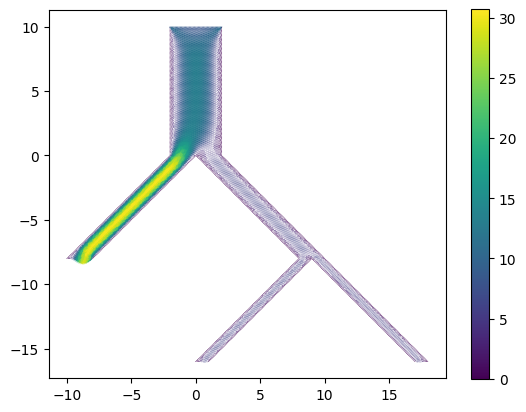

In [11]:
sol = plot(u)
plt.colorbar(sol)

In [12]:
rename_boundaries = MeshFunction("size_t", mesh,1)
rename_boundaries.set_all(0)
n_tags_b = len(np.unique(bounds.array()))
for i in range(n_tags_b):
    rename_boundaries.array()[bounds.array()==4+i] = i+1
ds1 = Measure("dS",domain=mesh, subdomain_data=rename_boundaries)

mesh_load.ds

Measure('exterior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7fcd8c94b930>)

In [13]:
rename_faces = MeshFunction("size_t", mesh,2)
rename_faces.set_all(0)
n_tags_f = len(np.unique(face.array()))
for i in range(n_tags_b):
    rename_faces.array()[face.array()==4+i] = i+1
dx1 = Measure("dx",domain=mesh, subdomain_data=rename_faces)

In [14]:
datagen = gd.DataGenerator(u, mesh_load)

datagen.flux()

Calling FFC just-in-time (JIT) compiler, this may take some time.


AssertionError: 

In [ ]:
flux = dot(u, n('+'))*ds1(1)
total_flux = assemble(flux)
total_flux

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


28.877106561586768

In [ ]:
flux = p*dx1(6)
total_flux = assemble(flux)
total_flux

Calling FFC just-in-time (JIT) compiler, this may take some time.


2.0416626179552133